<a href="https://colab.research.google.com/github/KAMBLE/ChatBot/blob/master/Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('/content/sample_data/international-airline-passengers.csv')

In [0]:
train = data[:int(len(data)*0.7)]
test  = data[int(len(data)*0.7):]

In [5]:
train.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
## Arima takes univariate series as input so droping Month
train.drop('Month',axis=1,inplace=True)
test.drop('Month',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


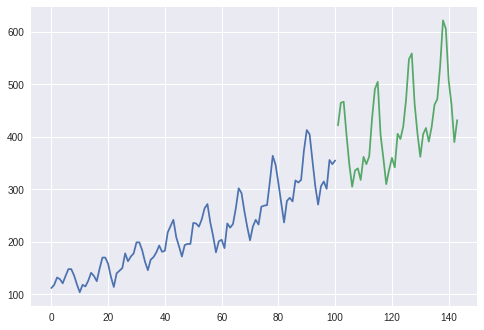

In [7]:
#plotting the data 
train['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()
test['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot()

In [8]:
!pip install pyramid.arima

  Using cached https://files.pythonhosted.org/packages/5c/84/57422f2a6ade3161c586545e38b518ba1b7ab30ee4a4acc29110c0aba2bc/pyramid_arima-0.9.0-cp36-cp36m-manylinux1_x86_64.whl


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=895.566, BIC=911.197, Fit time=0.391 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=917.952, BIC=923.162, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=915.557, BIC=923.372, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=913.419, BIC=921.234, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=894.597, BIC=907.623, Fit time=0.235 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=908.790, BIC=919.211, Fit time=0.137 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=896.545, BIC=912.176, Fit time=0.449 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=903.738, BIC=914.159, Fit time=0.186 seconds
Total fit time: 1.514 seconds


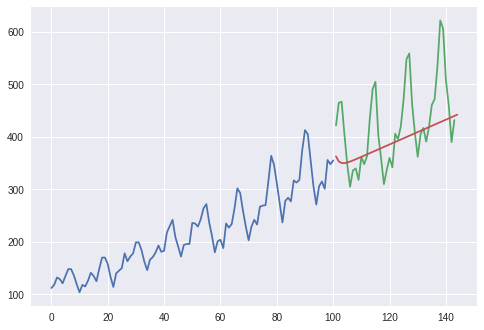

In [13]:
#building model
from pyramid.arima import auto_arima 

model = auto_arima(train,trace=True,error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index=test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()